# CS105 Final Project
Presented by: Rasa Jahromi, Kenny Thai, Terence Mui, Dilan Guerrero, Manit Bishnoi

## Project Description
In recent years, electric vehicles have been taking the car market by storm. With rising concerns about climate change and environmental sustainability, many are considering switching to electric vehicles to help our planet. President Biden, our very own Governor Newsom, many American families, automakers, and auto workers agree the future of transportation is electric. Knowing the right price of electric vehicles is important today because it can help individuals and businesses make informed decisions about their transportation options.  However, electric vehicles can be more expensive than traditional gasoline vehicles, and understanding the costs involved can help consumers weigh the benefits and make the best choice for their needs and budget. This sparked the idea for our group to set a goal of trying to predict the price of electric vehicles based on their features. We can achieve this goal by using Machine Learning techniques we learned in the CS105 class. One such technique is Supervised Learning. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss. But before doing that, we need a sufficient dataset that can help us with this process. <br>

### The Dataset
Records of title activity (transactions recording the changes of ownership), and registration activity (transactions authorizing vehicles to be used on Washington public roads) for electric vehicles in the state of Washington. Dataset includes records from 2020-Present (Last updated: 2/17/2023). This dataset has 600,000+ rows initially. Using this dataset, we have access to the price electric vehicles were bought and sold along side with features such as the Model Year, Make of the vehicle, Model of the vehicle, odometer reading (mileage), whether the car was new or used, the date of the purchase, the type of the car, etc. This dataset is from the Department of Licensing in Washington and listed on a government website thus credible. <br>
Link to dataset: https://catalog.data.gov/dataset/electric-vehicle-title-and-registration-activity

## Data Cleaning
- We will first remove all unwanted columns that are unnecessary to our goal. There are 32 columns and we do not need all of them.
- Next we will remove all rows that are not related to purchase or sale of vehicles. This is because we are not interested in other title activity (such as registeration renewal) since they do not provide any information about the price in which the car was bought or sold which is what we are predicting. The rows missing sale price are also missing the odometer reading of the car which is a crucial factor when predicting price of any car. Even ignoring those two points, the dataset is big enough to be able to afford dropping rows. In conclusion, dropping rows with no sale price is valid in this situation.
- We will also remove all cars that are not Battery Electric Vehicle (Example: Hybrid cars). This removal is because our goal is to predict prices of electric cars, not including hybrid vehicles.
- We will now get rid of the outliers. We want to make sure that there are no cars with negative mileages, or odometer readings above 250,000 miles. We also want to restrict the model year of the cars to be from (and including) 2000 to 2023. Lastly, we noticed that there are cars that are being sold for extremely cheap or extremely expensive. An example was a NISSAN LEAF which was being sold for \\$12,312,016. We later on figured that this price is very similar to the date 12/31/2016 which shows us that there could be data entry mistakes. As a result, we decided to limit the sale price of these cars to \\$100 to \\$300,000. The reason why we chose \\$350k as a bound was when we were doing EDA, we found that Porsche Taycan was the most expensive car being sold at around \\$300k.
- Since we know each car has a unique vin number, we can simplify the vin numbers and use them as index.

In [ ]:
import pandas as pd
import numpy as np

#Read the csv file
cars_df = pd.read_csv("car.csv")

#Data cleaning: Remove unwanted columns
cars_df = cars_df.iloc[:,[0,1,3,4,5,6,7,8,10,11,16]]

#Data cleaning: Remove all rows with no sale price
#Why not predict the price and not drop the row? 
#Because rows with no sale price are not guarenteed to have odometer reading
#Additionaly, the dataset is big enough to be able to afford dropping rows
cars_df = cars_df[cars_df["Sale Price"] != 0]

#Data cleaning: Remove all cars that are not Battery Electric Vehicle (Example: Hybrid cars)
cars_df = cars_df[cars_df["Clean Alternative Fuel Vehicle Type"] == "Battery Electric Vehicle (BEV)"]

#Data cleaning: Getting rid of outliers
cars_df = cars_df[cars_df["Odometer Reading"] >= 0]
cars_df = cars_df[cars_df["Odometer Reading"] <= 150000]
cars_df = cars_df[cars_df["Model Year"] >= 2010]
cars_df = cars_df[cars_df["Model Year"] <= 2023]
cars_df = cars_df[cars_df["Sale Price"] <= 300000]
cars_df = cars_df[cars_df["Sale Price"] > 1000]

#Since we know each car has a unique vin number, we
#can simplify the vin numbers and use them as index
cars_df["VIN (1-10)"] = cars_df.reset_index().index + 1
cars_df = cars_df.rename(columns={"VIN (1-10)": "Car ID"})

# Split the data into training and test sets.
cars_df = cars_df.set_index("Car ID")
cars_train = cars_df.loc[:100000].copy()
cars_test = cars_df.loc[100000:].copy()

# Smaller sample data set which has chosen random rows (every 10th row)
cars_temp = cars_df.iloc[::10, :]
cars_temp = cars_temp.iloc[:,[1,2,3,6,7,8,9]]

# Log transform the target(Sale Price) for visualization purposes only
cars_train["log(Sale Price)"] = np.log(cars_train["Sale Price"])

cars_df
#cars_train
#cars_test
#cars_temp

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,Transaction Year
Car ID,,,,,,,,,,
1,Battery Electric Vehicle (BEV),2014,MERCEDES-BENZ,B-Class,Passenger,87,37031,Used,19443,2018
2,Battery Electric Vehicle (BEV),2018,TESLA,Model 3,Passenger,215,50,New,65700,2018
3,Battery Electric Vehicle (BEV),2023,TESLA,Model Y,Passenger,0,15,New,84440,2022
4,Battery Electric Vehicle (BEV),2014,TESLA,Model S,Passenger,208,30840,Used,66864,2017
5,Battery Electric Vehicle (BEV),2022,TESLA,Model Y,Passenger,0,15,New,61440,2022
...,...,...,...,...,...,...,...,...,...,...
109263,Battery Electric Vehicle (BEV),2022,RIVIAN,R1T,Truck,0,100,New,82295,2022
109264,Battery Electric Vehicle (BEV),2022,TESLA,Model 3,Passenger,0,187,New,75290,2022
109265,Battery Electric Vehicle (BEV),2011,NISSAN,Leaf,Passenger,73,64000,Used,1540,2022


## Exploratory Data Analysis (EDA)


In [2]:
#Mean and std of odometer reading
cars_mean = cars_df["Odometer Reading"].mean()
cars_std = cars_df["Odometer Reading"].std()
print("Average of Odometer Reading: ", cars_mean)
print("Standard deviation of Odometer Reading: ", cars_std)

Average of Odometer Reading:  7468.408030851336
Standard deviation of Odometer Reading:  16379.392737834867


Observation: The average odometer reading on vehicles is 7,462 miles. This shows us that the electric cars are relatively low mileage. This could also mean that there are a lot of new cars with very low to none mileage on them which makes sense since electric cars are becoming more and more popular. The standard deviation of odometer reading is also 16368 miles which is nothing out of the ordinary.

In [3]:
#Mean and std of sale price
price_mean = cars_df["Sale Price"].mean()
price_std = cars_df["Sale Price"].std()
print("Average sale price: ", price_mean)
print("Standard deviation of sale price: ", price_std)

Average sale price:  50814.74307307088
Standard deviation of sale price:  26458.028474900086


Observation: We can see that on average, electric cars in this dataset are being sold for \\$50,830. This goes to show that electric cars are much more expensive than your average gasoline car thus gives us more motivation to try and predict the price of these rather expensive cars. The standard deviation for price is \\$26,462 which again is nothing too strange. We can also guess that there are a lot of newer cars, thus higher prices, because of the earlier visualization we did with odometer readings.

In [4]:
#Most popular Model Year, Make, and Model
popular_year = cars_df["Model Year"].mode()
popular_make = cars_df["Make"].mode()
popular_model = cars_df["Model"].mode()
print("Most popular model year: ", popular_year)
print("Most popular make: ", popular_make) 
print("Most popular model: ", popular_model)

Most popular model year:  0    2022
Name: Model Year, dtype: int64
Most popular make:  0    TESLA
Name: Make, dtype: object
Most popular model:  0    Model 3
Name: Model, dtype: object


Observation: No big surprises here. We can see that the most popular car make is TESLA and the most popular car model is Model 3 (TESLA). The most popular model year is 2022 which shows how much electric car purchases have became popular in recent years.

In [5]:
#Lists the top 10 cheapest cars
cars_df.nsmallest(10, ['Sale Price'])

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,Transaction Year
Car ID,,,,,,,,,,
71439,Battery Electric Vehicle (BEV),2013,NISSAN,Leaf,Passenger,75,71450,Used,112,2018
108486,Battery Electric Vehicle (BEV),2020,KIA,Niro,Passenger,239,121,New,121,2020
92294,Battery Electric Vehicle (BEV),2022,TESLA,Model X,Passenger,0,2993,Used,123,2022
77378,Battery Electric Vehicle (BEV),2018,NISSAN,Leaf,Passenger,151,98,New,134,2018
41177,Battery Electric Vehicle (BEV),2014,NISSAN,Leaf,Passenger,84,61199,Used,150,2022
52222,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,203,16,New,173,2021
10243,Battery Electric Vehicle (BEV),2011,NISSAN,Leaf,Passenger,73,47652,Used,192,2021
9462,Battery Electric Vehicle (BEV),2015,FIAT,500,Passenger,87,48000,Used,200,2022
24304,Battery Electric Vehicle (BEV),2011,NISSAN,Leaf,Passenger,73,87000,Used,200,2022


Observation: Some interesting observations here. We can see that there are relatively new electric cars being sold for very cheap. It is highly unbelievable to be buying or selling electric cars for such prices. What we are guessing is that:
- There could be data entry mistakes
- People might be trying to pay less taxes by reporting lower numbers
- Parties that know eachother gifting cars to one another for very low prices <br>
- We are not aware of the condition of the cars so they might be in brutal conditions(accidents, salvaged, etc.)

We cannot tell for certain why these cars are being sold very cheap but those are the guesses we can make. Thus we are going to be wary of the integrity of our predictions knowing about this observation.

In [6]:
#Lists the top 10 expensive cars
cars_df.nlargest(10, ['Sale Price'])

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,Transaction Year
Car ID,,,,,,,,,,
92186,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,0,1554,Used,269995,2022
1264,Battery Electric Vehicle (BEV),2020,PORSCHE,Taycan,Passenger,192,18,New,260950,2019
21879,Battery Electric Vehicle (BEV),2022,PORSCHE,Taycan,Passenger,0,11,New,246920,2022
31488,Battery Electric Vehicle (BEV),2022,PORSCHE,Taycan,Passenger,0,48,New,229320,2022
51512,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,192,14,New,227830,2021
27522,Battery Electric Vehicle (BEV),2020,PORSCHE,Taycan,Passenger,192,60,New,226970,2021
46684,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,0,29,New,223550,2021
49846,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,192,274,New,221720,2021
34278,Battery Electric Vehicle (BEV),2021,PORSCHE,Taycan,Passenger,192,127,New,221620,2022


Observation: No surprise here. We can see that Porsche Taycan is for certain one of the most expensive electric cars being bought and sold in this dataset.

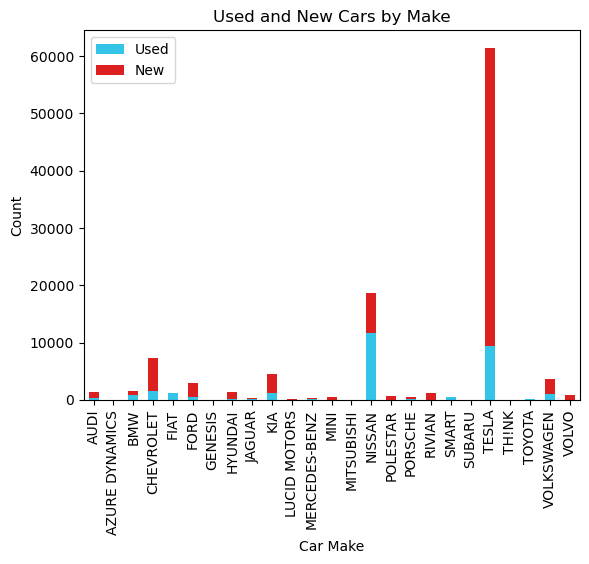

In [7]:
import matplotlib.pyplot as plt

#New and used cars distribution
used_cars_count = cars_df[cars_df['New or Used Vehicle'] == 'Used'].groupby('Make')['New or Used Vehicle'].count()
new_cars_count = cars_df[cars_df['New or Used Vehicle'] == 'New'].groupby('Make')['New or Used Vehicle'].count()
counts_df = pd.concat([used_cars_count, new_cars_count], axis=1, keys=['Used', 'New'])
colors = ['#34C4E7', '#DC2020']
ax = counts_df.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Used and New Cars by Make')
plt.show()

Observation: We can see that the car makes are heavily dominated by TESLA cars. NISSAN comes in second, and CHEVROLET is third. There are also more new TESLA cars than used ones. This is not the case for NISSAN however, as there are more used NISSAN electric cars than newer ones. Overall, there are much more newer cars than used cars.

(0.0, 200000.0)

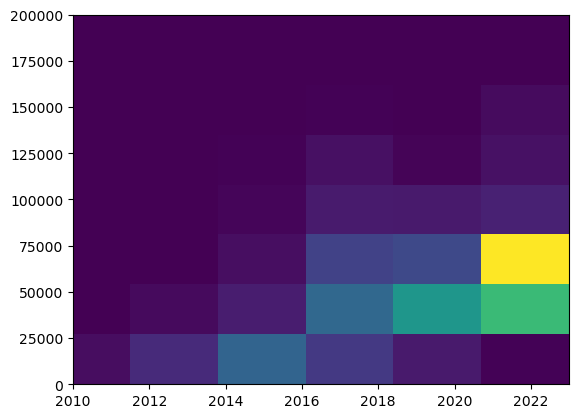

In [8]:
import matplotlib.pyplot as plt

cars_df = cars_df[cars_df["Sale Price"] <= 300000]

plt.hist2d(cars_df['Model Year'], cars_df['Sale Price'])
plt.xlim(2010, 2023)
plt.ylim(0, 200000)


Observation: We can note a couple trends in this heat map. Firstly, as the year increases, the frequency seems to increase across all price ranges. This matches our general knowledge of the industry, as electric vehicles have become much more common and accessible over the past couple of years. Furthermore, we can also note the market and sale price generally increase over the years.

<AxesSubplot:xlabel='Make'>

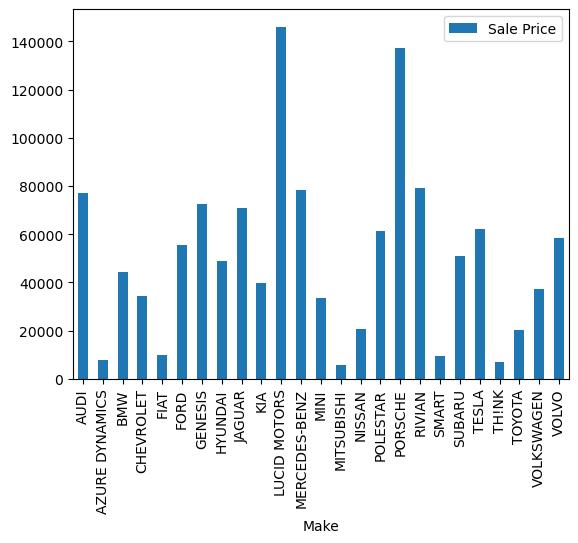

In [9]:
pd.pivot_table(data=cars_df, values = 'Sale Price', index='Make', aggfunc=np.mean).plot(kind='bar')

Observation: As we can see, our two peaks in terms of sales price are for Lucid Motors vehicles and Porsche vehicles. This is consistent in terms of our background domain knowledge of the subject as Lucid Motors and Porsche are both known for premium high end luxury vehicles while companies such as Fiat and Toyota are known to have affordable everyday consumer vehicles.

(-2.0, 150000.0)

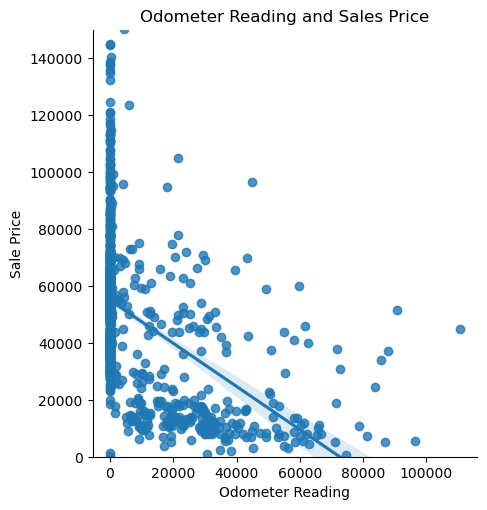

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cars_smaller_sample = cars_df.iloc[::100, :]
cars_smaller_sample = cars_smaller_sample.iloc[:,[1,2,3,6,7,8,9]]

sns.lmplot(x='Odometer Reading', y='Sale Price',data=cars_smaller_sample)
plt.title('Odometer Reading and Sales Price')
plt.ylim(-2,150000)

Observation: The first thing to note is that this scatter plot was heavily populated. Thus we created a smaller sample represeting the entire population in order to make it more visually appealing. We took every 100th car, reducing the population by a factor of 100 to get this scatter plot. We can see that the line of best fit is showing us a negative correlation. This is telling us that our intuition is right that cars with higher mileage and more expensive than cars with lower mileage and that mileage plays a very big factor when it comes to the price of the car. Also another quick observation is that there are a lot of cars on the 0 (or very close to it) odometer reading which reinfornces the previous observations that most cars here have less mileage on them.

In [11]:
#Odomoter Reading and Sale Price
corr = cars_df["Odometer Reading"].corr(cars_df["Sale Price"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient:", corr)

Pearson correlation coefficient: -0.4267779321914627


Observation: This is just an extended observation of the scatter plot. As you can see there is a negative correlation between mileage and sale price. Generally speaking, anything over 0.2 (or under -0.2) in Pearson correlation coefficient is considered string correlation and here we can see about -0.4 which is very telling of mileage and sale price relationship.

In [12]:
#Model Year and Sale Price
corr = cars_df["Model Year"].corr(cars_df["Sale Price"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient:", corr)

Pearson correlation coefficient: 0.4968626076855328


Observation: Since our Pearson correlation is a value of about 0.497, we can assume that our data has a relatively high positive correlation. From this data, it is safe to conclude that Model Year and Sale Price have a strong positive relationship with one another.

In [130]:
cars_df.describe()

,Model Year,Electric Range,Odometer Reading,Sale Price,Transaction Year
count,109267.000000,109267.000000,109267.000000,109267.000000,109267.000000
mean,2019.398364,105.837234,7397.968005,50878.277019,2020.342226
std,2.718412,108.772941,16151.611811,26417.041784,1.708651
min,2010.000000,0.000000,0.000000,1100.000000,2016.000000
25%,2018.000000,0.000000,15.000000,35300.000000,2019.000000
50%,2020.000000,84.000000,32.000000,51940.000000,2021.000000
75%,2022.000000,215.000000,3033.500000,62290.000000,2022.000000
max,2023.000000,337.000000,149000.000000,269995.000000,2023.000000


Table observation:
Furthermore, the average and standard deviation of the sale price shows us that most of our data is within the 25000-75000 range. This also matches our domain knowledge of the industry, as most electric vehicles sold fall within this range. This can be confirmed on various online vehicle purchasing websites as well as the original manufacturer's suggested retail price.
The median of the odometer reading is only 32 miles while the mean is 7468. Since most of the cars are sold new, this creates a strong skew towards the lower values. This is represented in our data with such a low median with a high mean.

## Feature Selection

What we used for feature selection was domain knowledge. Originally, we planned to use a more mathematical approach using Pearson correlation and the chi-sqaured test but we found flaws tha would arise from such approach. One flaw is that, in some cases, using one feature by itself is not enought to find a accurate correlation with an output. Lets say we have 3 different features, A B and C. A and B as well as B and C are not correlated, but A+B can be correlated with C. Applying this to the context of our data, let our 3 features be make, electric range and sale price. Make does not correlate to electric range and electric range does not correlate with sale price, but make and electric range are correlated with sale price. We would not be able to capture this correlation with Pearson or chi squared, so we found domain knowledge to be our best option since there are well known and consistent trends in the car market.

The features we used are make, model, year and odometer reading. Make was chosen since it is well known that the price of a car is strongly correlated with the make of a car, a car made by Mercedes will typically always cost more than a car from Toyota. Our next feature was the model of the car. Car companies always sell different models that target different price ranges, typically the latter having more/better features, so price between different models can vary drastically. Using Tesla as an example, their Model 3 is made to be more accessible to the overall population and its price reflects so. If we look at their Model X, it is more targetted for higher-end consumers and and its price is therefore higher. Finally we used odometer reading as a cars price will always be reflected by its odometer reading. We use year as it is a good metric to gauge the relevance of a car’s features(i.e 2001 Toyota with just radio and cassette vs 2023 that has Carplay and Blindspot sensors). It is a good indication of its condition, and typically people will always pay more for a car that has been used less.

In [14]:
#Model Year and Sale Price
corr = cars_df["Model Year"].corr(cars_df["Sale Price"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient:", corr)

Pearson correlation coefficient: 0.4968626076855328


In [15]:
#Odomoter Reading and Sale Price
corr = cars_df["Odometer Reading"].corr(cars_df["Sale Price"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient:", corr)

Pearson correlation coefficient: -0.4267779321914627


In [16]:
#Transaction Year and Sale Price
corr = cars_df["Transaction Year"].corr(cars_df["Sale Price"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient:", corr)

Pearson correlation coefficient: 0.21640344422053712


Above are some examples of what we were initially going to use in order to find the top features to use.

## K-Nearest Neighbors

We are first going to only use 2 features and try to predict the Sale Price of the Electric vehicles. This way we can visualize how K-NN works and we can grasp a better understanding of the process instead of just simply using sklearn library. Let's focus on just two features first: Model Year and odometer reading. We are going to plot the training data, using a color gradient to represent the target Sale Price. Notice that the Sale Price is shown using log which is done for the sole purpose of visualization purposes (to make the colors more appealing).

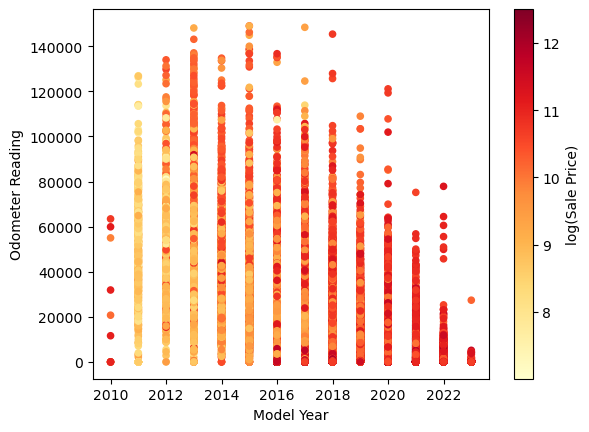

In [126]:
import matplotlib.cm as cm

ax = cars_train.plot.scatter(x="Model Year", y="Odometer Reading", c="log(Sale Price)", cmap=cm.YlOrRd)

We can observe that cars that are newer and have low mileage on this scatterplot are more expensive. Similarly, older cars and cars with more mileage are cheaper. This insight is the basis of the K-NN algorithm for predicting the car price. The KNN regression algorithm can be summarized as follows:
1. Determine the $k$ closest points in the training data to the new point that you want to predict for, based on some distance metric on the features.
2. The predicted label of the new point is the mean (or median) of the labels of the $k$ closest points.

Now we will implement this in code. First, we will need to scale our features. We can either use standardization or normalization. Since we know that normalization is appropriate for data with a skewed distribution and while standardization is appropriate for data with a Gaussian distribution, we will first take a look at our data to better decide what scaling method to use. 

Text(0, 0.5, 'Frequency')

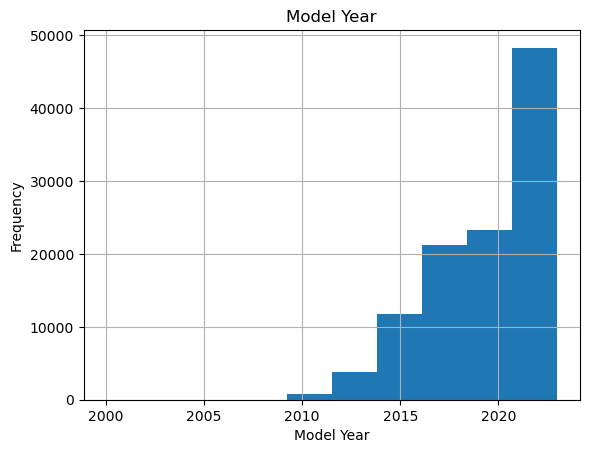

In [18]:
cars_df["Model Year"].hist()
plt.title("Model Year")
plt.xlabel("Model Year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

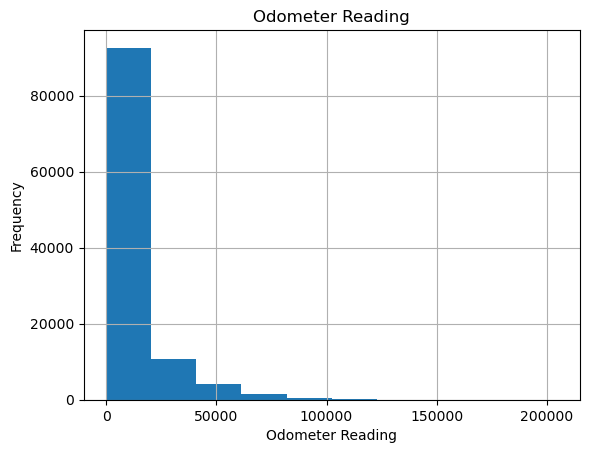

In [19]:
cars_df["Odometer Reading"].hist()
plt.title("Odometer Reading")
plt.xlabel("Odometer Reading")
plt.ylabel("Frequency")

We can observe that the data is not following a gaussian distribution thus we will be scaling the data using the method of normalization.

In [20]:
X_train = cars_train[["Model Year", "Odometer Reading"]]
y_train = cars_train["log(Sale Price)"]

# Normalize the features
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_nr = (X_train - X_train_min) / (X_train_max - X_train_min)

Now, we get the features for the new observation (i.e., the last row which is 2021 with 13 miles), normalizing it in the same way.

In [21]:
x_new = cars_test.loc[109428, ["Model Year", "Odometer Reading"]]

x_new_nr = (x_new - X_train_min) / (X_train_max - X_train_min)
x_new_nr

Model Year          0.913043
Odometer Reading    0.000064
dtype: object

Now we calculate the (Euclidean) distances between the 2021 car with 13 miles and the cars in the training data.

In [22]:
dists = np.sqrt(((X_train_nr - x_new_nr) ** 2).sum(axis=1))
dists

Car ID
1         0.354048
2         0.130435
3         0.086957
4         0.339588
5         0.043478
            ...   
99996     0.192627
99997     0.086957
99998     0.086957
99999     0.109915
100000    0.043478
Length: 100000, dtype: float64

Now, we sort the distances. The first 5 of these are the nearest neighbors. To get the year of these nearest neighbors, we get the index.

In [23]:
i_nearest = dists.sort_values().index[:300]
i_nearest

Int64Index([ 2679, 39908, 81211, 81217, 62217, 27725, 48584, 39748, 29974,
            16632,
            ...
            53748, 15613, 24619, 82690, 11592, 67136, 16179, 58737, 96071,
            67100],
           dtype='int64', name='Car ID', length=300)

We can look up these years in the training data.

In [24]:
cars_train.loc[i_nearest]

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,Transaction Year,log(Sale Price)
Car ID,,,,,,,,,,,
2679,Battery Electric Vehicle (BEV),2021,BMW,i3,Passenger,0,13,New,43645,2021,10.683844
39908,Battery Electric Vehicle (BEV),2021,CHEVROLET,Bolt EV,Passenger,0,13,New,41630,2021,10.636576
81211,Battery Electric Vehicle (BEV),2021,VOLKSWAGEN,ID.4,Passenger,0,13,New,41949,2021,10.644210
81217,Battery Electric Vehicle (BEV),2021,VOLKSWAGEN,ID.4,Passenger,0,13,New,49370,2022,10.807098
62217,Battery Electric Vehicle (BEV),2021,NISSAN,Leaf,Passenger,0,13,New,33055,2021,10.405928
...,...,...,...,...,...,...,...,...,...,...,...
67136,Battery Electric Vehicle (BEV),2021,VOLKSWAGEN,ID.4,Passenger,0,12,New,47190,2021,10.761937
16179,Battery Electric Vehicle (BEV),2021,VOLKSWAGEN,ID.4,Passenger,0,12,New,51250,2022,10.844471
58737,Battery Electric Vehicle (BEV),2021,MINI,Hardtop,Passenger,110,12,New,38440,2021,10.556854


To make a prediction for the price of the 2021 car with 12 miles, we average the sale prices of these 5-nearest neighbors. <br>
The example we will be talking about is: <br>
Car ID: 109428, E-type: Battery Electric Vehicle, Year: 2021, Make: VOLKSWAGEN, Model: ID.4, Type: Passenger, Mileage: 13, New car, Transaction Year: 2022, Price: \\$45690

In [25]:
y_train.loc[i_nearest].mean()
np.exp(y_train.loc[i_nearest].mean())

49234.26628423616

So the model predicts that the price of the vehicle is about $49,000.

Of course, the model above only had two features so it was easy to visualize the "nearest neighbors" on the scatterplot. The power of $k$-nearest neighbors is that it still works when there are more features and the data is not possible to visualize. Thus we will be using sklearn library in order to use multiple features. Lets create a model (or pipeline) for that includes all of the features we want to use. Note that for the Make and Model, we will need to use One Hot Encoding since they are categorical values. We will use column transform in order to acheive the scaling part and then create the pipeline.

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

ct = make_column_transformer(
    (MinMaxScaler(), ["Model Year", "Odometer Reading"]),
    (OneHotEncoder(handle_unknown='ignore'), ["Make", "Model"]),
    remainder="drop"  # all other columns in X will be dropped.
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=100)
)

pipeline.fit(X=cars_temp[["Model Year", "Odometer Reading", "Make", "Model"]], 
             y=cars_temp["Sale Price"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Model Year',
                                                   'Odometer Reading']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=100))])

For now, we will use square root of n (number of all rows) for the k value and next we will optimize it. But before that, let's take a look at the same vehicle we were looking at earlier to see if there are any improvement in our predictions since we are using more features.

In [17]:
#Debugging note: If future errors arise, get rid of "[],dtype=pd.StringDtype()"
x_test = pd.Series([],dtype=pd.StringDtype())
x_test["Model Year"] = 2021
x_test["Odometer Reading"] = 13
x_test["Make"] = "VOLKSWAGEN"
x_test["Model"] = "ID.4"

pipeline.predict(X=pd.DataFrame([x_test]))

array([47885.54])

As you can see the predicted price is closer to the actual price by a difference of more than \\$1000 which is a big improvement. Once we tune k to the best value, we can further improve the results. Now lets try and tune the $k$ value. We will be trying all $k$ values from 1 to square root of the instances we have.
One way to get the best k is by minimizing the error. We could use a measure of error known as _mean squared error_ (or _MSE_, for short):

$$ 
\begin{align*}
\textrm{MSE} &= \textrm{mean of } (y - \hat y)^2.
\end{align*}
$$ 

MSE is difficult to interpret because its units are the square of the units of the label. To make MSE more interpretable, it is common to take the _square root_ of the MSE to obtain the _root mean squared error_ (or _RMSE_, for short):

$$ 
\begin{align*}
\textrm{RMSE} &= \sqrt{\textrm{MSE}}.
\end{align*}
$$ 

The RMSE measures how off a "typical" prediction is.

In [190]:
from sklearn.model_selection import cross_val_score

# Define a list of k values to try
k_values = list(range(1, 30))

ct = make_column_transformer(
    (MinMaxScaler(), ["Model Year", "Odometer Reading"]),
    (OneHotEncoder(handle_unknown='ignore'), ["Make", "Model"]),
    remainder="drop"  # all other columns in X will be dropped.
)
print("Number of rows in dataset:", cars_temp.shape[0])
# Loop over the k values and compute cross-validation scores
cv_scores = []
for k in k_values:
    pipeline = make_pipeline(
        ct,
        KNeighborsRegressor(n_neighbors=k)
    )
    scores = cross_val_score(pipeline, X=cars_temp.drop('Sale Price', axis=1), y=cars_temp['Sale Price'], scoring="neg_mean_squared_error", cv = 10)
    cv_scores.append(np.mean(scores))

# Find the k value with the highest cross-validation score
highest_score = k_values[np.argmax(cv_scores)]
print("Best k value:", highest_score)

Number of rows in dataset: 10927
Best k value: 14


In the above section, we are utilizing Negative Mean Squared Error to find the $k$ value we should use that yields the least error. We first define a range of k values in which we want to test. We use a loop for our values and for each iteration, we will keep track of the cross-validation scores (AKA negative MSE errors) by appending them to an array. After we are done, we take the least error and print out the best k accordingly. 

The significance in which we wish to use cross-validation is so that we can assess whether our $k$ is a good reflection of independent sets of data. 

In [191]:
highest_score = np.argmax(cv_scores)
score = np.sqrt(-cv_scores[highest_score])
#print("score:", score)

rmse = np.array(cv_scores)
rmse = rmse * -1
rmse = np. sqrt(rmse)
rmse

array([11624.81103616, 10162.59747382,  9896.51858572,  9769.16828062,
        9650.23504234,  9566.38745528,  9534.34838921,  9543.24805694,
        9477.25564795,  9448.05324546,  9439.26630034,  9428.71054247,
        9420.84961691,  9419.18432306,  9425.28550552,  9457.39888711,
        9467.72305518,  9506.72859085,  9549.40374884,  9592.38383498,
        9639.26781841,  9688.47711795,  9740.00944366,  9774.42443272,
        9795.32200499,  9817.68404223,  9819.41943105,  9819.71458794,
        9826.67908483])

Here, we are taking the negative mean squared errors, multiplying them by -1 so that they are all positive and then taking the square root of them in order to find the root mean square error (RMSE). As you can see, the best $k$ value for this dataset is determined based on the least amount of error. We can plot different values of $k$ and see how error differentiates across them.

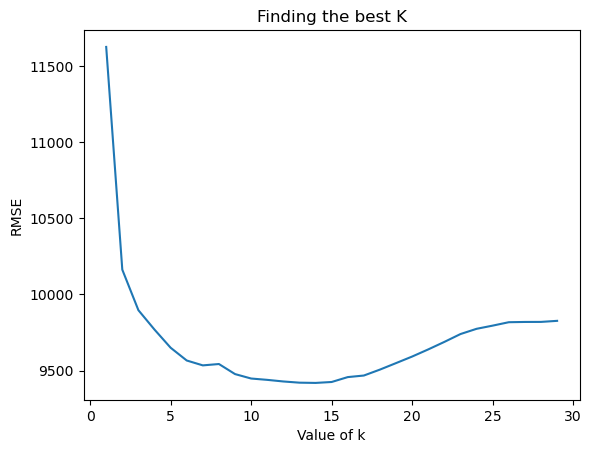

In [192]:
import matplotlib.pyplot as plt

# Plot the cross-validation scores for each k value
plt.plot(k_values, rmse)
plt.xlabel('Value of k')
plt.ylabel('RMSE')
plt.title('Finding the best K')
plt.show()


As you can see, the best value of $k$ is at $k$=14. Now lets take a look back at the same Volkswagen vehicle we have been looking at to see if optimizing k has had any impact on the improvement of the model.

In [185]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

ct = make_column_transformer(
    (MinMaxScaler(), ["Model Year", "Odometer Reading"]),
    (OneHotEncoder(handle_unknown='ignore'), ["Make", "Model"]),
    remainder="drop"  # all other columns in X will be dropped.
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=14)
)

pipeline.fit(X=cars_temp[["Model Year", "Odometer Reading", "Make", "Model"]], 
             y=cars_temp["Sale Price"])

x_test = pd.Series([],dtype=pd.StringDtype())
x_test["Model Year"] = 2021
x_test["Odometer Reading"] = 13
x_test["Make"] = "VOLKSWAGEN"
x_test["Model"] = "ID.4"

pipeline.predict(X=pd.DataFrame([x_test]))

array([47641.42857143])

As you can see, the predicted price for this example is now very close to the actual price! (The actual price being: $45690)

In [194]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X=cars_temp[["Model Year", "Odometer Reading", "Make", "Model","New or Used Vehicle", "Transaction Year"]], y=cars_temp["Sale Price"], scoring="neg_mean_squared_error", cv=10)

# Print the mean score and standard deviation
print("NMSE Scores:", cv_scores)
print("RMSE Scores:", rmse)
print("Mean RMSE:", np.mean(rmse))
print("Standard deviation of RMSE scores:", np.std(rmse))

NMSE Scores: [-8.54141021e+07 -1.18504578e+08 -9.55328867e+07 -8.47925714e+07
 -9.78648002e+07 -9.67927731e+07 -1.01398266e+08 -8.23794756e+07
 -1.13465723e+08 -8.94910418e+07]
RMSE Scores: [11624.81103616 10162.59747382  9896.51858572  9769.16828062
  9650.23504234  9566.38745528  9534.34838921  9543.24805694
  9477.25564795  9448.05324546  9439.26630034  9428.71054247
  9420.84961691  9419.18432306  9425.28550552  9457.39888711
  9467.72305518  9506.72859085  9549.40374884  9592.38383498
  9639.26781841  9688.47711795  9740.00944366  9774.42443272
  9795.32200499  9817.68404223  9819.41943105  9819.71458794
  9826.67908483]
Mean RMSE: 9700.019158018347
Standard deviation of RMSE scores: 406.1815467315494


Results and conclusion:
Add description here as to why the RMSE is off by so much. Ideas: condition of the car, private seller or dealership, trim of the car